In [65]:
# Zindi Challenge 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True)
%matplotlib inline

In [66]:
data_train = pd.read_csv('train.csv', index_col=0)
data_test = pd.read_csv('Test.csv', index_col=0)
data_unlinked_transact = pd.read_csv('unlinked_masked_final.csv', index_col=0)

In [3]:
data_train.head()

,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
CustomerId,,,,,,,,,,,,,,,,,,,,,
CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
We can see that quite a few values are missing from the training data set which has to be fixed


In [67]:
data_test.head()

,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
CustomerId,,,,,,,,,,,,,,,,,,
CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [5]:
data_unlinked_transact.head()

,BatchId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
TransactionId,,,,,,,,,,,
TransactionId_18876,BatchId_7899,CustomerId_250,UGX,256,ProviderId_2,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,30/6/19 22:57:49
TransactionId_15089,BatchId_8829,CustomerId_423,UGX,256,ProviderId_5,ProductId_7,airtime,ChannelId_3,800.0,800.0,30/6/19 22:39:11
TransactionId_9561,BatchId_15250,CustomerId_423,UGX,256,ProviderId_2,ProductId_10,financial_services,ChannelId_3,2000.0,2000.0,30/6/19 22:35:53
TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,30/6/19 19:47:00
TransactionId_3104,BatchId_5171,CustomerId_193,UGX,256,ProviderId_5,ProductId_1,airtime,ChannelId_3,5000.0,5000.0,30/6/19 19:11:01


In [68]:
data_train_overall = pd.merge(data_train, data_unlinked_transact, how='left', on='CustomerId')


In [69]:
data_train_overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130512 entries, 0 to 130511
Data columns (total 37 columns):
CustomerId                130512 non-null object
TransactionStartTime_x    130512 non-null object
Value_x                   130512 non-null float64
Amount_x                  130512 non-null float64
TransactionId             130512 non-null object
BatchId_x                 130512 non-null object
SubscriptionId            130512 non-null object
CurrencyCode_x            130512 non-null object
CountryCode_x             130512 non-null int64
ProviderId_x              130512 non-null object
ProductId_x               130512 non-null object
ProductCategory_x         130512 non-null object
ChannelId_x               130512 non-null object
TransactionStatus         130512 non-null int64
IssuedDateLoan            118509 non-null object
AmountLoan                118509 non-null float64
Currency                  118509 non-null object
LoanId                    118509 non-null object
PaidOn

It can be seen that the number of entries is not uniform acrross all columns in the dataset. Data cleaning can be used to fix the dataset. The data has integers , float and object value types. Xente received 118120 loan applications

Data Exploration & Visualization 

In [10]:
print(data_train_overall.shape)

(130512, 37)


In [ ]:
The training data has 130512 observations and 37 characteristics


In [8]:
data_train_overall.describe()

,Value_x,Amount_x,CountryCode_x,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,CountryCode_y,Amount_y,Value_y
count,1.305120e+05,1.305120e+05,130512.0,130512.000000,1.185090e+05,118509.000000,118509.000000,118509.000000,130060.0,130060.000000,130060.000000
mean,1.063629e+04,-1.056233e+04,256.0,0.908031,5.547940e+03,0.871470,0.983529,0.009248,256.0,5686.760288,5748.743272
std,1.139183e+05,1.139038e+05,0.0,0.288983,6.492461e+04,0.334681,0.127280,0.095722,0.0,15855.154179,16007.044574
min,1.000000e+02,-2.500000e+06,256.0,0.000000,5.000000e+01,0.000000,0.000000,0.000000,256.0,50.000000,50.000000
25%,1.000000e+03,-5.000000e+03,256.0,1.000000,1.050000e+03,1.000000,1.000000,0.000000,256.0,1000.000000,1000.000000
50%,2.000000e+03,-2.000000e+03,256.0,1.000000,1.687000e+03,1.000000,1.000000,0.000000,256.0,1750.000000,1750.000000
75%,5.000000e+03,-1.000000e+03,256.0,1.000000,5.000000e+03,1.000000,1.000000,0.000000,256.0,5000.000000,5000.000000
max,2.500000e+06,-1.000000e+02,256.0,1.000000,2.760000e+06,1.000000,1.000000,1.000000,256.0,1000000.000000,1000000.000000


In [9]:
data_train_overall.columns

Index(['CustomerId', 'TransactionStartTime_x', 'Value_x', 'Amount_x',
       'TransactionId', 'BatchId_x', 'SubscriptionId', 'CurrencyCode_x',
       'CountryCode_x', 'ProviderId_x', 'ProductId_x', 'ProductCategory_x',
       'ChannelId_x', 'TransactionStatus', 'IssuedDateLoan', 'AmountLoan',
       'Currency', 'LoanId', 'PaidOnDate', 'IsFinalPayBack', 'InvestorId',
       'DueDate', 'LoanApplicationId', 'PayBackId', 'ThirdPartyId',
       'IsThirdPartyConfirmed', 'IsDefaulted', 'BatchId_y', 'CurrencyCode_y',
       'CountryCode_y', 'ProviderId_y', 'ProductId_y', 'ProductCategory_y',
       'ChannelId_y', 'Amount_y', 'Value_y', 'TransactionStartTime_y'],
      dtype='object')

Data cleaning

In [11]:
data_train_overall.apply(lambda x: sum(x.isnull()))

CustomerId                    0
TransactionStartTime_x        0
Value_x                       0
Amount_x                      0
TransactionId                 0
BatchId_x                     0
SubscriptionId                0
CurrencyCode_x                0
CountryCode_x                 0
ProviderId_x                  0
ProductId_x                   0
ProductCategory_x             0
ChannelId_x                   0
TransactionStatus             0
IssuedDateLoan            12003
AmountLoan                12003
Currency                  12003
LoanId                    12003
PaidOnDate                12003
IsFinalPayBack            12003
InvestorId                12003
DueDate                   12193
LoanApplicationId         12392
PayBackId                 12003
ThirdPartyId              12005
IsThirdPartyConfirmed     12003
IsDefaulted               12003
BatchId_y                   452
CurrencyCode_y              452
CountryCode_y               452
ProviderId_y                452
ProductI

Note that the IsDefaulted column is the target variable column and we have missing values in the train set. Most variables need some imputing of missing values.

In [12]:
data_train_overall.apply(lambda x: len(x.unique()))

CustomerId                  421
TransactionStartTime_x     1760
Value_x                      98
Amount_x                     77
TransactionId              1758
BatchId_x                  1713
SubscriptionId                6
CurrencyCode_x                1
CountryCode_x                 1
ProviderId_x                  1
ProductId_x                  16
ProductCategory_x             7
ChannelId_x                   1
TransactionStatus             2
IssuedDateLoan             1160
AmountLoan                  648
Currency                      2
LoanId                     1160
PaidOnDate                 1485
IsFinalPayBack                3
InvestorId                    4
DueDate                    1156
LoanApplicationId          1157
PayBackId                  1486
ThirdPartyId               1482
IsThirdPartyConfirmed         3
IsDefaulted                   3
BatchId_y                 13036
CurrencyCode_y                2
CountryCode_y                 2
ProviderId_y                  5
ProductI

Looking at the dataset reveals there are features with single values which doesnot contain any information for modelling and can badly affect the learning process. The target variable shows there are 3 types of values for the target variables which should be remediated since it is a binary variable. We can expect other variables to also contain missing values. We can further explore the frequency of different categories as follows:


In [ ]:
data_train_overall.to_csv()

In [70]:
# get number of unique values for each column
counts = data_train_overall.nunique()
counts1 = data_train_overall.columns
# record columns to delete
#to_del = [i for i,v in enumerate(counts) if v == 1]
to_del = [counts1[i] for i,v in enumerate(counts) if v == 1]
to_del1 = ['CustomerId','TransactionStartTime_x','BatchId_y', 'ProviderId_y','ProductId_y','ProductCategory_y','ChannelId_y','TransactionStartTime_y', 'TransactionId','BatchId_x','SubscriptionId','ProductId_x']
print(to_del)
# drop useless columns
data_train_overall.drop(to_del, axis=1, inplace=True)
print(data_train_overall.shape)

data_train_overall.drop(to_del1, axis=1, inplace=True)
print(data_train_overall.shape)

['CurrencyCode_x', 'CountryCode_x', 'ProviderId_x', 'ChannelId_x', 'Currency', 'CurrencyCode_y', 'CountryCode_y']
(130512, 30)
(130512, 18)


In [72]:
data_train_overall.head()
features_all = data_train_overall.columns


In [53]:
# summarize the number of rows with missing values for each column
for i in range(data_train_overall.shape[1]):
	# count number of rows with missing values
		# count number of rows with missing values
	n_miss = data_train_overall.apply(lambda x: sum(x.isnull()))
	#n_miss = data_train_overall.apply(lambda x: x.isnull().sum())
	#n_miss = data_train_overall[[i]].isnull().sum()
	perc = n_miss / data_train_overall.shape[0] * 100
	#print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
	#print('> %d, Missing:  %d (%.1f%%)' % (i, n_miss[i], perc))
	print(perc)

Value_x                  0.000000
Amount_x                 0.000000
ProductCategory_x        0.000000
TransactionStatus        0.000000
IssuedDateLoan           9.196855
AmountLoan               9.196855
LoanId                   9.196855
PaidOnDate               9.196855
IsFinalPayBack           9.196855
InvestorId               9.196855
DueDate                  9.342436
LoanApplicationId        9.494912
PayBackId                9.196855
ThirdPartyId             9.198388
IsThirdPartyConfirmed    9.196855
IsDefaulted              9.196855
Amount_y                 0.346328
Value_y                  0.346328
dtype: float64
Value_x                  0.000000
Amount_x                 0.000000
ProductCategory_x        0.000000
TransactionStatus        0.000000
IssuedDateLoan           9.196855
AmountLoan               9.196855
LoanId                   9.196855
PaidOnDate               9.196855
IsFinalPayBack           9.196855
InvestorId               9.196855
DueDate                  9.342436

Value_x                  0.000000
Amount_x                 0.000000
ProductCategory_x        0.000000
TransactionStatus        0.000000
IssuedDateLoan           9.196855
AmountLoan               9.196855
LoanId                   9.196855
PaidOnDate               9.196855
IsFinalPayBack           9.196855
InvestorId               9.196855
DueDate                  9.342436
LoanApplicationId        9.494912
PayBackId                9.196855
ThirdPartyId             9.198388
IsThirdPartyConfirmed    9.196855
IsDefaulted              9.196855
Amount_y                 0.346328
Value_y                  0.346328
dtype: float64
Value_x                  0.000000
Amount_x                 0.000000
ProductCategory_x        0.000000
TransactionStatus        0.000000
IssuedDateLoan           9.196855
AmountLoan               9.196855
LoanId                   9.196855
PaidOnDate               9.196855
IsFinalPayBack           9.196855
InvestorId               9.196855
DueDate                  9.342436

we can see that some columns have no missing values and other columns have either a few missing variables or at most 10% of missing values. The missing values will be imputed next


In [75]:
data_train_overall.apply(lambda x: sum(x.isnull()))

Value_x                      0
Amount_x                     0
ProductCategory_x            0
TransactionStatus            0
IssuedDateLoan           12003
AmountLoan               12003
LoanId                   12003
PaidOnDate               12003
IsFinalPayBack           12003
InvestorId               12003
DueDate                  12193
LoanApplicationId        12392
PayBackId                12003
ThirdPartyId             12005
IsThirdPartyConfirmed    12003
IsDefaulted              12003
Amount_y                   452
Value_y                    452
dtype: int64

In [91]:

data_train_overall['IssuedDateLoan'].fillna(method='bfill', inplace=True)
data_train_overall['AmountLoan'].fillna(method ='ffill', inplace=True)
data_train_overall['LoanId'].fillna(method ='bfill', inplace=True)
data_train_overall['PaidOnDate'].fillna(method ='bfill', inplace=True)
data_train_overall['IsFinalPayBack'].fillna(method ='bfill', inplace=True)
data_train_overall['InvestorId'].fillna(method ='bfill', inplace=True)
data_train_overall['DueDate'].fillna(method ='bfill', inplace=True)
data_train_overall['LoanApplicationId'].fillna(method ='bfill', inplace=True)
data_train_overall['PayBackId'].fillna(method ='bfill', inplace=True)
data_train_overall['ThirdPartyId'].fillna(method ='bfill', inplace=True)
data_train_overall['IsThirdPartyConfirmed'].fillna(method ='bfill', inplace=True)
data_train_overall['IsDefaulted'].fillna(method ='ffill', inplace=True)
data_train_overall['Value_y'].fillna(data_train_overall['Value_y'].mean(), inplace=True)
data_train_overall['Amount_y'].fillna(data_train_overall['Amount_y'].mean(), inplace=True)
#
# = df_train.drop(columns="loannumber")
#df_train = df_train.drop(columns="customerid")
data_train_overall.apply(lambda x: sum(x.isnull()),axis=0)

Value_x                  0
Amount_x                 0
ProductCategory_x        0
TransactionStatus        0
IssuedDateLoan           0
AmountLoan               0
LoanId                   0
PaidOnDate               0
IsFinalPayBack           0
InvestorId               0
DueDate                  0
LoanApplicationId        0
PayBackId                0
ThirdPartyId             0
IsThirdPartyConfirmed    0
IsDefaulted              0
Amount_y                 0
Value_y                  0
dtype: int64

In [74]:
categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='object']
#categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','PaidOnDate','DueDate','LoanApplicationId','PayBackId','ThirdPartyId']]
#categorical_columns = [x for x in categorical_columns ]
for col in categorical_columns:
    print('\n Frequency of categories for variable %s'%col)
    
    print(data_train_overall[col].value_counts())


 Frequency of categories for variable ProductCategory_x
airtime               99659
data_bundles          16759
tv                     6425
utility_bill           5298
retail                 1099
movies                  644
financial_services      628
Name: ProductCategory_x, dtype: int64

 Frequency of categories for variable InvestorId
InvestorId_1    103868
InvestorId_2     14059
InvestorId_3       582
Name: InvestorId, dtype: int64


In [84]:
data_train_overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130512 entries, 0 to 130511
Data columns (total 18 columns):
Value_x                  130512 non-null float64
Amount_x                 130512 non-null float64
ProductCategory_x        130512 non-null object
TransactionStatus        130512 non-null int64
IssuedDateLoan           130512 non-null object
AmountLoan               130512 non-null float64
LoanId                   130512 non-null object
PaidOnDate               130512 non-null object
IsFinalPayBack           130512 non-null float64
InvestorId               130512 non-null object
DueDate                  130512 non-null object
LoanApplicationId        130512 non-null object
PayBackId                130512 non-null object
ThirdPartyId             130512 non-null object
IsThirdPartyConfirmed    130512 non-null float64
IsDefaulted              130512 non-null float64
Amount_y                 130512 non-null float64
Value_y                  130512 non-null float64
dtypes: float64(8)

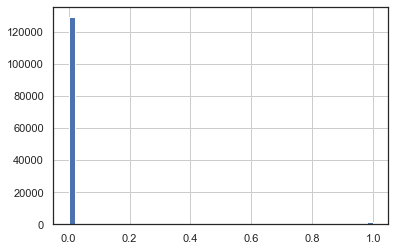

In [92]:
%matplotlib inline
data_train_overall['IsDefaulted'].hist(bins=50)


 Frequency of categories for variable Value_x

 Frequency of categories for variable Amount_x

 Frequency of categories for variable AmountLoan

 Frequency of categories for variable IsFinalPayBack

 Frequency of categories for variable IsThirdPartyConfirmed

 Frequency of categories for variable IsDefaulted

 Frequency of categories for variable Amount_y

 Frequency of categories for variable Value_y


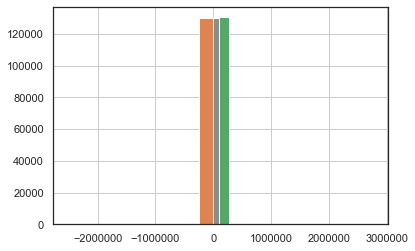

In [95]:
categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='float']
#categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='object']

    
       
#categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='object']
#categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes['float']
#categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes['float']
#categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','PaidOnDate','DueDate','LoanApplicationId','PayBackId','ThirdPartyId']]
#categorical_columns = [x for x in categorical_columns ]
for col in categorical_columns:
    print('\n Frequency of categories for variable %s'%col)
    
    #print(data_train_overall[col].value_counts())
    data_train_overall[col].hist(bins=10)


 Frequency of categories for variable Value_x

 Frequency of categories for variable Amount_x

 Frequency of categories for variable AmountLoan

 Frequency of categories for variable IsFinalPayBack

 Frequency of categories for variable IsThirdPartyConfirmed

 Frequency of categories for variable IsDefaulted

 Frequency of categories for variable Amount_y

 Frequency of categories for variable Value_y


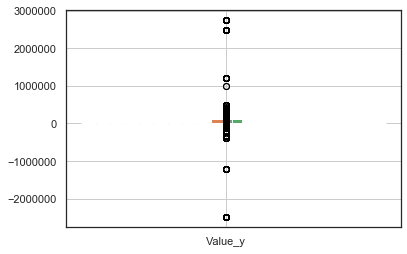

In [96]:
categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='float']
#categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='object']

    
       
#categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='object']
#categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes['float']
#categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes['float']
#categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','categorical_columns = [x for x in data_train_overall.dtypes.index if data_train_overall.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['IssuedDateLoan','LoanId','PaidOnDate','DueDate','LoanApplicationId','PayBackId','ThirdPartyId']]
#categorical_columns = [x for x in categorical_columns ]
for col in categorical_columns:
    print('\n Histograms and Box plot for variable %s'%col)
    
    #print(data_train_overall[col].value_counts())
    data_train_overall[col].hist(bins=10)
    data_train_overall.boxplot(column=col)

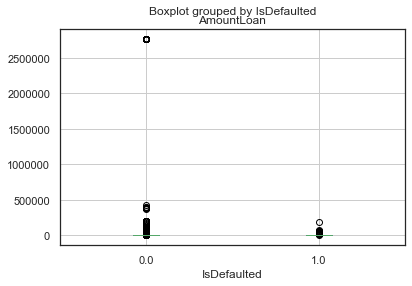

In [97]:
data_train_overall.boxplot(column='AmountLoan', by ='IsDefaulted')


From this above figure, we can conclude that high loan amount usually result in defaulting the loan

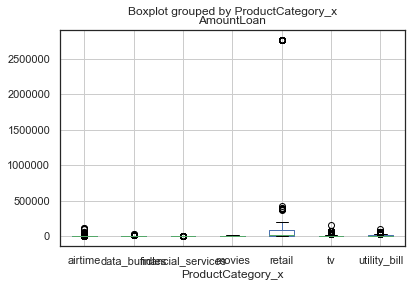

In [102]:
data_train_overall.boxplot(column='AmountLoan', by='ProductCategory_x')

As it can be seen, most of the loans is spend for groceries at the retail followed by TV, airtime and utility bills

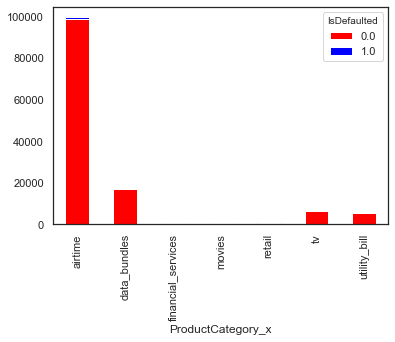

In [104]:
temp3 = pd.crosstab(data_train_overall['ProductCategory_x'], data_train_overall['IsDefaulted'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Here we can see that for most defaulted loans, most of the funds was spent for airtime, data followed by TV and utility bills. Logically, the loan has more chance to not default if the funds are spent on something that can grow the money or give a retun. Based on this, i would recommend the client to grant loan to individuals with steady income or individuals that are planning to put the funds into something profitable

In [105]:
data_train_overall["IsDefaulted"].value_counts()

0.0    129050
1.0      1462
Name: IsDefaulted, dtype: int64

It can be seen that the class is imbalanced with the amount of good loans being way less than that of bad loans. This need to be fixed to avoid errors 

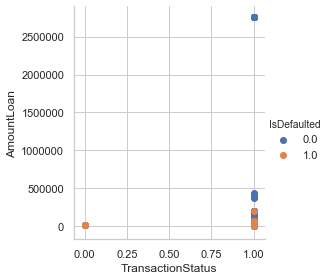

In [107]:
# 2-D Scatter plot with color-coding for each loan
# Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(data_train_overall, hue="IsDefaulted", height=4) \
   .map(plt.scatter, "TransactionStatus", "AmountLoan") \
   .add_legend();
plt.show()

From the figure above it can be seen that most accepted loans that defaulted apllied for larger loan amount than the good loans. we cannot really distinguish good from bad loans. Separating any of the classes from the other is much harder as they have considerable overlap

Pairs Plot

In order to see both the distribution of columns and the relationships between.

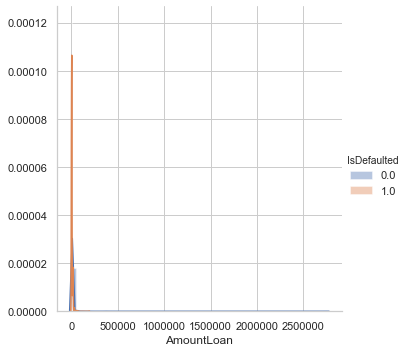

In [112]:
sns.FacetGrid(dataset_extract, hue="IsDefaulted", height=5)  \
   .map(sns.distplot, "AmountLoan")  \
   .add_legend();
plt.show();

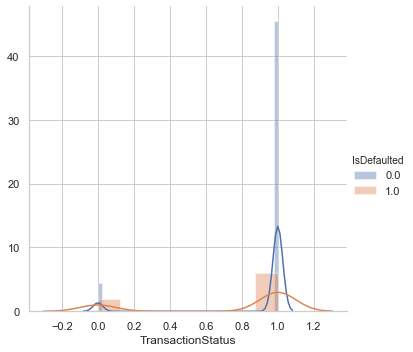

In [113]:
sns.FacetGrid(dataset_extract, hue="IsDefaulted", height=5)  \
   .map(sns.distplot, "TransactionStatus")  \
   .add_legend();
plt.show();

For accepted loans, there are more bad loans than good ones by a considerable margin. For rejected loans ,then there are more bad loans than good ones ones although the number of good loans is not much far behind

Cumulative Distribution Function

To determine the probability that a random observation that's taken from the population will be less than or equal to a certain value.

[9.47332421e-01 4.44596443e-02 4.78796170e-03 2.73597811e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.83994528e-04]
[   500.  19650.  38800.  57950.  77100.  96250. 115400. 134550. 153700.
 172850. 192000.]
[9.99256102e-01 2.47965905e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.95931809e-04]
[5.000000e+01 2.760450e+05 5.520400e+05 8.280350e+05 1.104030e+06
 1.380025e+06 1.656020e+06 1.932015e+06 2.208010e+06 2.484005e+06
 2.760000e+06]


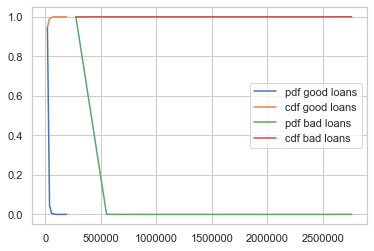

In [116]:
import numpy as np
good_loans = data_train_overall.loc[data_train_overall["IsDefaulted"] == 1];
bad_loans = data_train_overall.loc[data_train_overall["IsDefaulted"] == 0];

counts, bin_edges = np.histogram(good_loans['AmountLoan'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='pdf good loans')
plt.plot(bin_edges[1:], cdf, label='cdf good loans')

counts, bin_edges = np.histogram(bad_loans['AmountLoan'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='pdf bad loans')
plt.plot(bin_edges[1:], cdf, label='cdf bad loans')

plt.legend();
plt.show();


The x-axis in the above graph represents the loan amount. The y-axis represents the probabilities for the same.

Let's take the loan amount as 500 000. For 500 000 or less, we have approx 5% of bad loans with 95% of bad loans.

Feature selection and iterative imputation

In [118]:
# example of using the ColumnTransformer for the Abalone dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
# load dataset
#dataframe = read_csv('abalone.csv', header=None)
# split into inputs and outputs
last_ix = len(data_train_overall.columns) - 1
X, y = data_train_overall.drop(last_ix, axis=1), data_train_overall[last_ix]
#print(X.shape, y.shape)
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
# define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)
# define the model
model = SVR(kernel='rbf',gamma='scale',C=100)
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])
# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert MAE scores to positive values
scores = absolute(scores)
# summarize the model performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

ValueError: Found input variables with inconsistent numbers of samples: [130512, 905]

Final model

In [ ]:

import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

dataframe = data_test
#dataframe['IsDefaulted'] = mean_sales
dataset = dataframe.values
#dataset = dataframe


# split into input and output variables
X = dataset[:,0:-3]
Y = dataset[:,-3]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)

encoded_Y = encoder.transform(Y)

# define base model
# dropout in hidden layers with weight constraint
#def create_model():
    
    # create model
model = Sequential()
model.add(Dense(12, input_dim=3, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.15))
model.add(Dense(8, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.15))
#model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal', activation='tanh'))
    # Compile model
sgd = SGD(lr=0.1, momentum=0.7, decay=0.0, nesterov=False)
    #model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    #mean_squared_error
    #mean_absolute_error
    #hinge
    #squared_hinge
    #mean_squared_logarithmic_error
model.compile(loss='hinge', optimizer=sgd, metrics=['accuracy'])
#return model

numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=30, batch_size=16, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


#history1 = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
#print("Hidden: %.2f%% (%.2f%%)" % (history1.mean()*100, history1.std()*100))

# Fit the model
#model.fit(X, encoded_Y, validation_split=0.4, epochs=100, batch_size=592, verbose=0)
history = model.fit(X, encoded_Y, validation_split=0.4, epochs=300, verbose=0, batch_size=80, callbacks=callbacks_list)

# evaluate the model
#scores = model.evaluate(Xnew, encoded_Y[1450:2900])


# list all data in history
#print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# make a prediction
Xnew = data_test
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
unique, counts = numpy.unique(ynew, return_counts=True)
print(dict(zip(unique, counts)) )
#scores = model.evaluate(Xnew, encoded_Y)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Business questions

● What would be your recommendation to the client based on your analysis?
Here we can see that for most defaulted loans, most of the funds was spent for airtime, data followed by TV and utility bills. Logically, the loan has more chance to not default if the funds are spent on something that can grow the money or give a retun. Based on this, i would recommend the client to grant loan to individuals with steady income or individuals that are planning to put the funds into something profitable.
● Please provide 1 relevant & interesting visualization and describe it to the
client
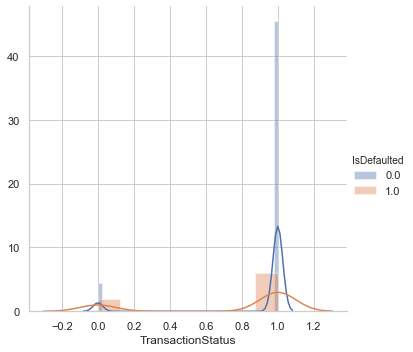
For accepted loans, there are more bad loans than good ones by a considerable margin. For rejected loans ,then there are more bad loans than good ones ones although the number of good loans is not much far behind
● If you were allowed to use external data what kind of data would you think of?
How do you think it would impact your predictions?
Personnal and finnacial data on didviduals applying for lloans can provide more details into why a loan default, It would definitely improve the accuracy of the model
● What would have been your next steps if you had more time? 
I would spend more time on multivariate analysis to explore and gather more insughts from the data. I would also explore different data cleaning, feature section and dimensionality techniques to improve the model accuracy
● Do you have any comments / feedback about the assessment?
It is a good assessment just that so much data is missing